In [1]:
%load_ext autoreload
%autoreload 2
from firecrown.models.cluster.deltasigma import ClusterDeltaSigma
from firecrown.models.cluster.abundance import ClusterAbundance
from firecrown.models.cluster.properties import ClusterProperty
from firecrown.likelihood.binned_cluster_number_counts import BinnedClusterNumberCounts
from firecrown.likelihood.binned_cluster_number_counts_deltasigma import BinnedClusterDeltaSigma
from firecrown.models.cluster.mass_proxy import MurataBinned
import sacc
import pyccl as ccl
import numpy as np
from firecrown.modeling_tools import ModelingTools
import matplotlib.pyplot as plt

In [2]:
mass_func = ccl.halos.MassFuncDespali16(mass_def='200c')

delta_sigma = ClusterDeltaSigma([12,15], [0.2,1.0], mass_func)

In [7]:
%%time
log_mass_list = np.linspace(12,15,10)
z_list = np.linspace(0.2,1.0,4)
radius_center = 3.0
cosmo = ccl.cosmology.CosmologyVanillaLCDM()
delta_sigma._cosmo = cosmo

prediction_1h = delta_sigma.delta_sigma(log_mass_list, z_list, radius_center)
print(prediction_1h)
prediction_2h = delta_sigma.delta_sigma(log_mass_list, z_list, radius_center, True)
print(prediction_2h)
prediction_2h = delta_sigma.delta_sigma(log_mass_list, z_list, radius_center, True, boost_factor = True)
print(prediction_2h)
prediction_miss = delta_sigma.delta_sigma(log_mass_list, z_list, radius_center, False, 0.2)
prediction_2h_boost = delta_sigma.delta_sigma(log_mass_list, z_list, radius_center, True)


[1.09139583e+11 2.38915903e+11 5.22238761e+11 1.13543730e+12]
[4.55778193e+11 6.48776423e+11 9.75646381e+11 1.62080833e+12]
[4.41075671e+11 6.27848151e+11 9.44173917e+11 1.56852419e+12]
CPU times: user 1min 30s, sys: 14 ms, total: 1min 30s
Wall time: 1min 27s


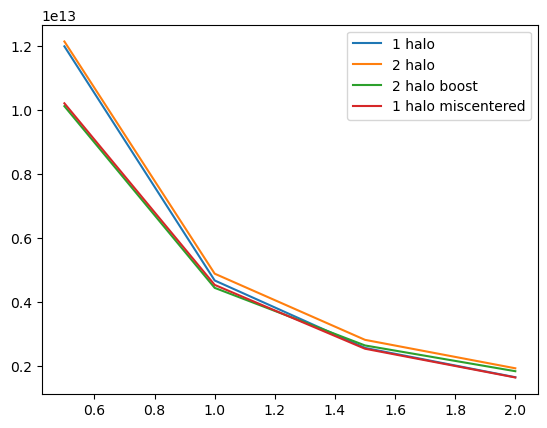

CPU times: user 30.7 s, sys: 6.98 ms, total: 30.8 s
Wall time: 28 s


In [8]:
%%time
log_mass_list = np.array([13])
z_list = np.array([0.1])
radius_center_list = np.array([.5, 1.0, 1.5, 2.0])
cosmo = ccl.cosmology.CosmologyVanillaLCDM()
delta_sigma._cosmo = cosmo
prediction_1h = []
prediction_2h = []
prediction_2h_boost = []
prediction_miss = []
for radius_center in radius_center_list:
    prediction_1h.append(delta_sigma.delta_sigma(log_mass_list, z_list, radius_center))
    prediction_2h.append(delta_sigma.delta_sigma(log_mass_list, z_list, radius_center, True))
    prediction_2h_boost.append(delta_sigma.delta_sigma(log_mass_list, z_list, radius_center, True, boost_factor = True))
    prediction_miss.append(delta_sigma.delta_sigma(log_mass_list, z_list, radius_center, False, 0.5))
    
plt.plot(radius_center_list, prediction_1h, label='1 halo')
plt.plot(radius_center_list, prediction_2h, label='2 halo')
plt.plot(radius_center_list, prediction_2h_boost, label='2 halo boost')
plt.plot(radius_center_list, prediction_miss, label='1 halo miscentered')
plt.legend()
plt.show()

In [5]:
print(prediction_miss)

[array([1.02155096e+13]), array([4.53000651e+12]), array([2.53212867e+12]), array([1.63201508e+12])]
